In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

In [5]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving housing_data.csv to housing_data.csv
User uploaded file "housing_data.csv" with length 1423529 bytes


In [41]:
df = pd.read_csv(file_name)

check null value


In [8]:
print(" Missing Values Before Cleaning ")
print(df.isnull().sum(), "\n")

 Missing Values Before Cleaning 
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64 



Remove rows containing any null values

In [9]:
df = df.dropna()
print("✅ Null values removed successfully!\n")

✅ Null values removed successfully!



summery dataset

In [10]:
print("Dataset ")
print(df.info(), "\n")

Dataset 
<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB
None 



first five rows


In [11]:
print("First 5 Rows of the Dataset ")
print(df.head(10))

First 5 Rows of the Dataset 
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   
7    -122.25     37.84                52.0       3104.0           687.0   
8    -122.26     37.84                42.0       2555.0           665.0   
9    -122.25     37.84                52.0       3549.0           707.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0      

Perform descriptive statistics for selected attributes

In [12]:
selected_features = ['median_income', 'total_rooms', 'population']
desc_stats = df[selected_features].describe().T
display(desc_stats)

,count,mean,std,min,25%,50%,75%,max
median_income,20433.0,3.871162,1.899291,0.4999,2.5637,3.5365,4.744,15.0001
total_rooms,20433.0,2636.504233,2185.269567,2.0000,1450.0000,2127.0000,3143.000,39320.0000
population,20433.0,1424.946949,1133.208490,3.0000,787.0000,1166.0000,1722.000,35682.0000


Add median separately

In [13]:
desc_stats['median'] = df[selected_features].median()
print(" Descriptive Statistics (mean, median, std, min, max) for selected attributes:")
display(desc_stats)

 Descriptive Statistics (mean, median, std, min, max) for selected attributes:


,count,mean,std,min,25%,50%,75%,max,median
median_income,20433.0,3.871162,1.899291,0.4999,2.5637,3.5365,4.744,15.0001,3.5365
total_rooms,20433.0,2636.504233,2185.269567,2.0000,1450.0000,2127.0000,3143.000,39320.0000,2127.0000
population,20433.0,1424.946949,1133.208490,3.0000,787.0000,1166.0000,1722.000,35682.0000,1166.0000


lode data

In [14]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing(as_frame=True)
df = california.frame

Plot histogram

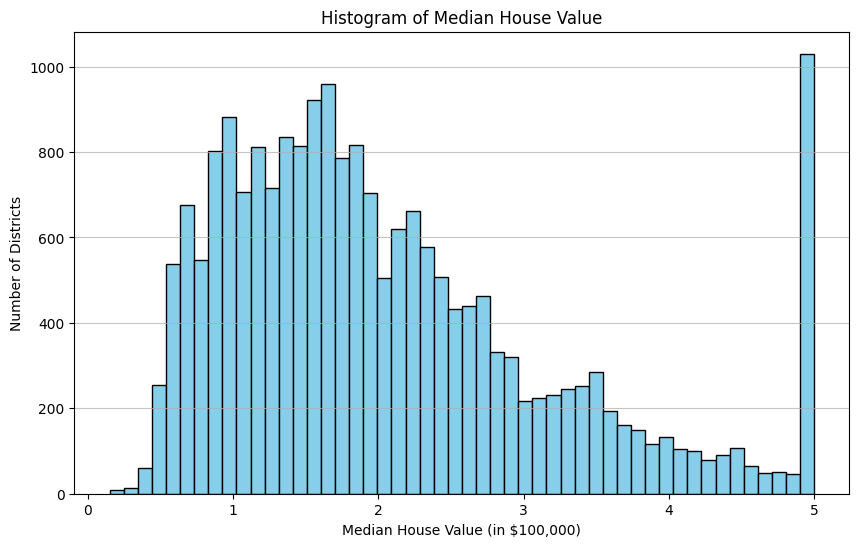

In [15]:
plt.figure(figsize=(10,6))
plt.hist(df['MedHouseVal'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Median House Value')
plt.xlabel('Median House Value (in $100,000)')
plt.ylabel('Number of Districts')
plt.grid(axis='y', alpha=0.75)
plt.show()

Scatter plot

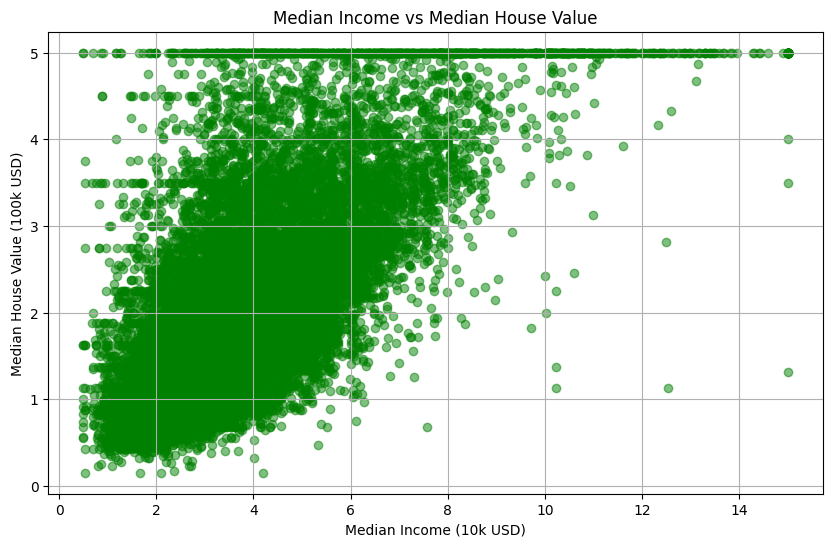

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(df['MedInc'], df['MedHouseVal'], alpha=0.5, color='green')
plt.title('Median Income vs Median House Value')
plt.xlabel('Median Income (10k USD)')
plt.ylabel('Median House Value (100k USD)')
plt.grid(True)
plt.show()

Geographical scatter plot

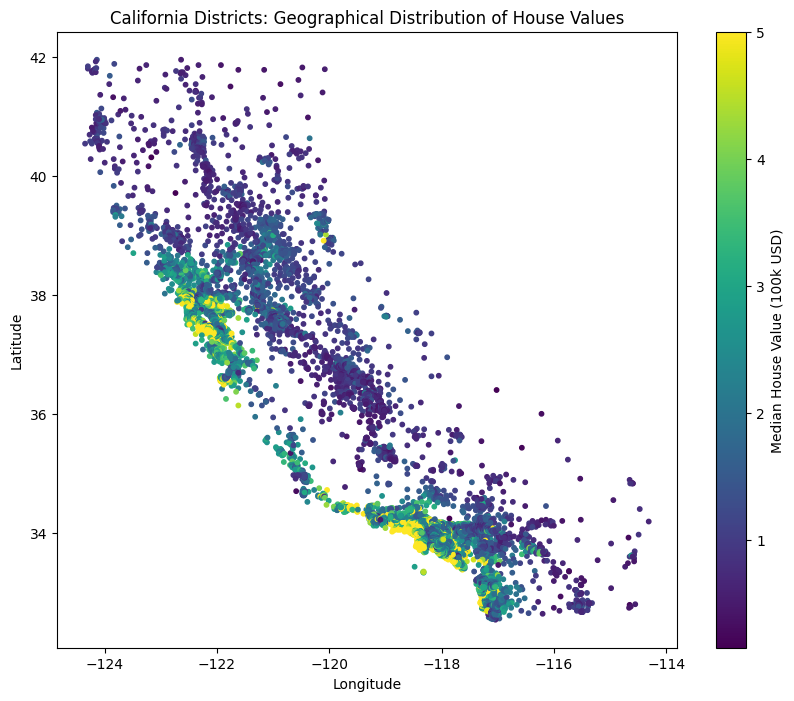

In [17]:
plt.figure(figsize=(10,8))
plt.scatter(df['Longitude'], df['Latitude'], c=df['MedHouseVal'], cmap='viridis', s=10)
plt.colorbar(label='Median House Value (100k USD)')
plt.title('California Districts: Geographical Distribution of House Values')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


 Correlation Matrix Heatmap

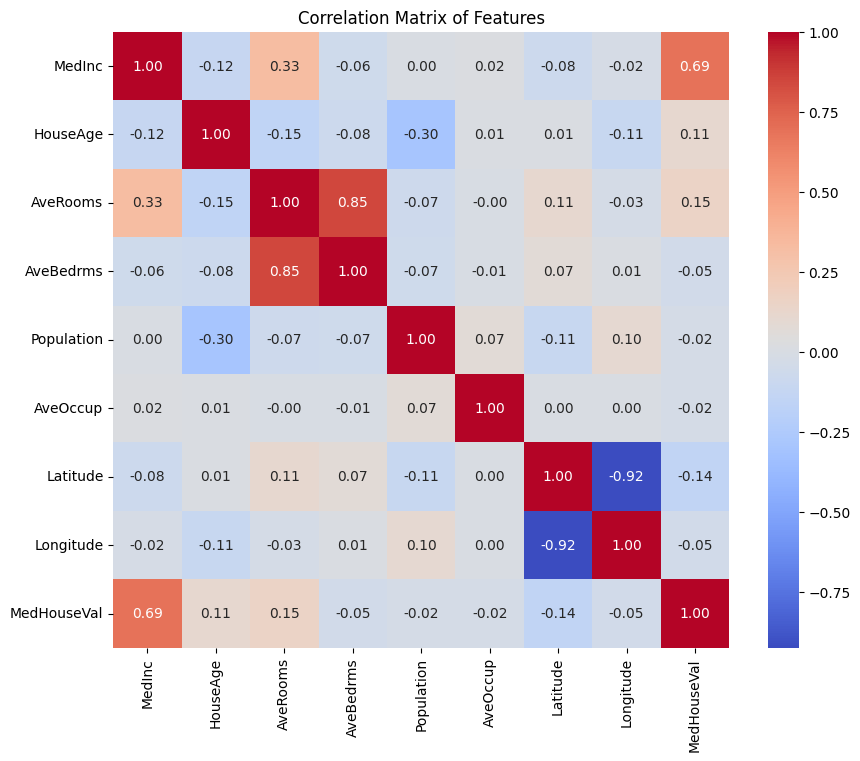

In [18]:

plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Features')
plt.show()

 strongest correlation with house value

In [19]:
target_corr = corr['MedHouseVal'].sort_values(ascending=False)
print("🔹 Features most strongly correlated with Median House Value:")
print(target_corr)

🔹 Features most strongly correlated with Median House Value:
MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64


Split dataset into training (80%) and testing (20%)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [43]:
print(f"🔹 Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

🔹 Training samples: 16512, Testing samples: 4128


Build Linear Regression Model

In [44]:


lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

Report coefficients and intercept

In [45]:
coeff_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': lin_reg.coef_})
display(coeff_df)

,Feature,Coefficient
0,MedInc,0.448675
1,HouseAge,0.009724
2,AveRooms,-0.123323
3,AveBedrms,0.783145
4,Population,-0.000002
5,AveOccup,-0.003526
6,Latitude,-0.419792
7,Longitude,-0.433708


In [31]:
print(f" Intercept: {lin_reg.intercept_}")

 Intercept: -37.02327770606409


Linear Regression Model

In [32]:

y_pred_lr = lin_reg.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [40]:
print(" Linear Regression Performance:")
print(f"Mean Squared Error (MSE): {mse_lr:.3f}")
print(f"R² Score: {r2_lr:.3f}")
print(" Interpretation: R² close to 0.6-0.65 indicates moderate predictive power; some variance remains unexplained.")

 Linear Regression Performance:
Mean Squared Error (MSE): 0.556
R² Score: 0.576
 Interpretation: R² close to 0.6-0.65 indicates moderate predictive power; some variance remains unexplained.


Build Decision Tree Regressor

In [34]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

Evaluate Decision Tree

In [35]:
y_pred_tree = tree_reg.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

In [36]:
print(" Decision Tree Regressor Performance:")
print(f"Mean Squared Error (MSE): {mse_tree:.3f}")
print(f"R² Score: {r2_tree:.3f}")
print(" Interpretation: Decision Tree may overfit training data; higher variance can improve R² on train but sometimes worse generalization on test set.")

 Decision Tree Regressor Performance:
Mean Squared Error (MSE): 0.495
R² Score: 0.622
 Interpretation: Decision Tree may overfit training data; higher variance can improve R² on train but sometimes worse generalization on test set.


Model Comparison

In [37]:
print(" Model Comparison:")
print(f"Linear Regression R²: {r2_lr:.3f}, MSE: {mse_lr:.3f}")
print(f"Decision Tree R²: {r2_tree:.3f}, MSE: {mse_tree:.3f}")

 Model Comparison:
Linear Regression R²: 0.576, MSE: 0.556
Decision Tree R²: 0.622, MSE: 0.495


In [38]:
if r2_lr > r2_tree:
    print(" Linear Regression performs better on the test set.")
else:
    print("Decision Tree performs better on the test set.")


Decision Tree performs better on the test set.
